# Breast Cancer Recurrence Prediction using Machine Learning

## Dataset

Variables in this dataset are:

***Class***: whether or not there has been a recurrence of cancer<br>
***Age***: patient's age at the time of diagnosis<br>
***Menopause***: menopausal status of the patient at the time of diagnosis, pre-menopausal (*premeno*) or post-menopausal (*ge40*, *lt40*) at the time of diagnosis:<br>
***Tumour Size***: the size of the tumour (mm) at the time of diagnosis<br>
***Invasive Nodes***: the total number of lymph nodes confirming Breast Cancer at the time of the histological examination<br>
***Node Caps***: whether the tumour penetrated in the lymph node capsule<br>
***Degree of Malignancy***: divided into 1 -2 or 3, depending on the malignancy of the tumour<br>
***Breast***: the position of the tumour (left or right breast)<br>
***Breast Quadrant***: the quadrant of the breast where the tumour is present<br>
***Irradiation***: whether radiation therapy has been used as a treatment to destroy cancer cells<br>

The data is provided as two separate ```.data``` files<br>
- ```breast-cancer.data```, containing the dataset 
- ```breast-cancer.names```, containing relevant informations about the dataset

In [41]:
# import libraries
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.set_option('display.max_colwidth', None) #setting max colwidth to view the entire dataset when using the print() command
np.random.seed(42) # TO DISCUSS

%matplotlib inline

In [42]:
feat = open("./dataset/breast-cancer.names").read()
feat

'Citation Request:\n   This breast cancer domain was obtained from the University Medical Centre,\n   Institute of Oncology, Ljubljana, Yugoslavia.  Thanks go to M. Zwitter and \n   M. Soklic for providing the data.  Please include this citation if you plan\n   to use this database.\n\n1. Title: Breast cancer data (Michalski has used this)\n\n2. Sources: \n   -- Matjaz Zwitter & Milan Soklic (physicians)\n      Institute of Oncology \n      University Medical Center\n      Ljubljana, Yugoslavia\n   -- Donors: Ming Tan and Jeff Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)\n   -- Date: 11 July 1988\n\n3. Past Usage: (Several: here are some)\n     -- Michalski,R.S., Mozetic,I., Hong,J., & Lavrac,N. (1986). The \n        Multi-Purpose Incremental Learning System AQ15 and its Testing \n        Application to Three Medical Domains.  In Proceedings of the \n        Fifth National Conference on Artificial Intelligence, 1041-1045,\n        Philadelphia, PA: Morgan Kaufmann.\n        -- accurac

In [43]:
# import the files
feat = open("./dataset/breast-cancer.names")
data = pd.read_csv("./dataset/breast-cancer.data", 
                   names=['class', 'age', 'menopause', 'tumour_size', 'inv_nodes', 'node_caps', 'deg_malig', 'breast', 'breast_quad', 'irrad'])


#data = data.read()
#feat = feat

In the informative, file we have important information about the dataset at *7. Attribute Information*. It is specified that the dataset includes missing values denoted with the attribute **'?'**

In [25]:
data.head()

,class,age,menopause,tumour_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irrad
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


### Transforming to DataFrame

The data is stored as ```str```. It is necessary to convert it to ```DataFrame``` format

In [19]:
# import libraries
import pandas as pd
pd.set_option('display.max_colwidth', None) #setting max colwidth to view the entire dataset when using the print() command
from io import StringIO
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

np.random.seed(42) # TO DISCUSS
%matplotlib inline

In [6]:
# convert data from str to dataframe
data = StringIO(data)
data = pd.read_csv(data, sep=",")
print(type(data)) #check the data variable is a pandas.core.frame.DataFrame

<class 'pandas.core.frame.DataFrame'>


Now that the data is correctly converted into a DataFrame table, I will rename the columns according to the attributes in the ```.names``` file

In [7]:
data.columns = ['class', 'age', 'menopause', 'tumour_size', 'inv_nodes', 'node_caps', 'deg_malig', 'breast', 'breast_quad', 'irrad']
data.columns

Index(['class', 'age', 'menopause', 'tumour_size', 'inv_nodes', 'node_caps',
       'deg_malig', 'breast', 'breast_quad', 'irrad'],
      dtype='object')

In [8]:
dataset = data[['class', 'age', 'menopause', 'tumour_size', 'inv_nodes', 'node_caps', 'deg_malig', 'breast', 'breast_quad', 'irrad']]
dataset

,class,age,menopause,tumour_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irrad
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
...,...,...,...,...,...,...,...,...,...,...
280,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
281,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
282,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
283,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


### Power Analysis

In [9]:
import statsmodels.stats.power as smp

# Define effect size, alpha, and power
effect_size = 0.5
alpha = 0.05
power = 0.9

# Convert categorical data to numerical data
dataset['class'] = pd.Categorical(dataset['class']).codes
dataset['age'] = pd.Categorical(dataset['age']).codes
dataset['menopause'] = pd.Categorical(dataset['menopause']).codes
dataset['tumour_size'] = pd.Categorical(dataset['tumour_size']).codes
dataset['inv_nodes'] = pd.Categorical(dataset['inv_nodes']).codes
dataset['node_caps'] = pd.Categorical(dataset['node_caps']).codes
dataset['deg_malig'] = pd.Categorical(dataset['deg_malig']).codes
dataset['breast'] = pd.Categorical(dataset['breast']).codes
dataset['breast_quad'] = pd.Categorical(dataset['breast_quad']).codes
dataset['irrad'] = pd.Categorical(dataset['irrad']).codes

# Count the total number of categories across all categorical features
n_classes = len(set(dataset[['class', 'age', 'menopause', 'tumour_size', 'inv_nodes', 'node_caps', 'deg_malig', 'breast', 'breast_quad', 'irrad']].values.flatten()))


# Perform power analysis
analysis = smp.GofChisquarePower()
sample_size = analysis.solve_power(effect_size, power=power, alpha=alpha, n_bins=n_classes)

print('Required Sample Size:', sample_size)

Required Sample Size: 84.79215339354673


### Sensitivity Analysis

In [10]:
# TO DISCUSS

# Define the new parameters
effect_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
alphas = [0.01, 0.05, 0.1]
powers = [0.6, 0.7, 0.8, 0.9]


total_new_sample_size = 0
# Compute the new sample sizes
for new_effect_size in effect_sizes:
    for new_alpha in alphas:
        for new_power in powers:
            new_sample_size = analysis.solve_power(new_effect_size, power=new_power, alpha=new_alpha, n_bins=n_classes)
            print(f"Effect size: {new_effect_size:.1f}, Alpha: {new_alpha:.2f}, Power: {new_power:.1f}, Sample size: {new_sample_size:.0f}")
            total_new_sample_size = total_new_sample_size+ new_sample_size
print('Mean Required Sample Size:',total_new_sample_size/107)

Effect size: 0.1, Alpha: 0.01, Power: 0.6, Sample size: 1696
Effect size: 0.1, Alpha: 0.01, Power: 0.7, Sample size: 1960
Effect size: 0.1, Alpha: 0.01, Power: 0.8, Sample size: 2289
Effect size: 0.1, Alpha: 0.01, Power: 0.9, Sample size: 2780
Effect size: 0.1, Alpha: 0.05, Power: 0.6, Sample size: 1157
Effect size: 0.1, Alpha: 0.05, Power: 0.7, Sample size: 1389
Effect size: 0.1, Alpha: 0.05, Power: 0.8, Sample size: 1680
Effect size: 0.1, Alpha: 0.05, Power: 0.9, Sample size: 2120
Effect size: 0.1, Alpha: 0.10, Power: 0.6, Sample size: 899
Effect size: 0.1, Alpha: 0.10, Power: 0.7, Sample size: 1113
Effect size: 0.1, Alpha: 0.10, Power: 0.8, Sample size: 1385
Effect size: 0.1, Alpha: 0.10, Power: 0.9, Sample size: 1797
Effect size: 0.2, Alpha: 0.01, Power: 0.6, Sample size: 424
Effect size: 0.2, Alpha: 0.01, Power: 0.7, Sample size: 490
Effect size: 0.2, Alpha: 0.01, Power: 0.8, Sample size: 572
Effect size: 0.2, Alpha: 0.01, Power: 0.9, Sample size: 695
Effect size: 0.2, Alpha: 0.05

In [10]:
# preview the DataFrame table created
data.head()

,class,age,menopause,tumour_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irrad
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


### Explore the Dataset

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        285 non-null    object
 1   age          285 non-null    object
 2   menopause    285 non-null    object
 3   tumour_size  285 non-null    object
 4   inv_nodes    285 non-null    object
 5   node_caps    277 non-null    object
 6   deg_malig    285 non-null    int64 
 7   breast       285 non-null    object
 8   breast_quad  284 non-null    object
 9   irrad        285 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.4+ KB


### Explore the target Attributes

I want to have a more thorough look at the data inside each attribute, starting from ```'class'``` which contains information about recurrence of Breast Cancer.

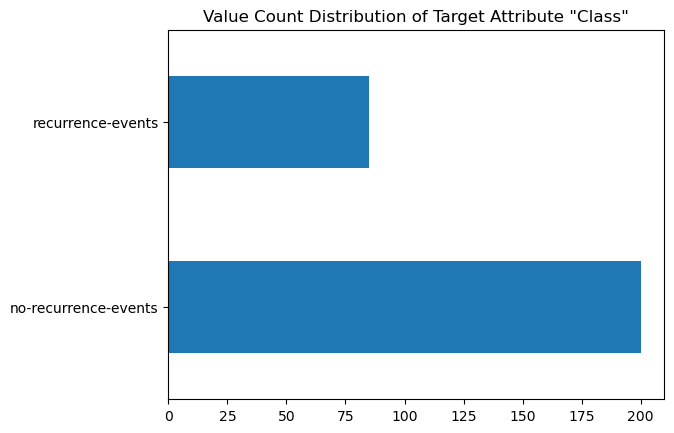

In [12]:
class_ = data['class'].value_counts()
class_.plot.barh()
plt.title('Value Count Distribution of Target Attribute "Class"')
plt.show()

About 70% of the dataset includes patients that didn't experience a recurrence of the disease. This means, and it is clearly shown, that the target attribute is heavily **unbalanced**. Machine learning models assume the data is balanced and perform poorly on imbalanced data, often predicting the majority value more frequently than the minority value. Some sampling might be necessary later on in the data processing step.

### Split the data into Train and Test set

For now I willl split my dataset into train and test sets and put the test set on the side. The test set will be the unseen data for evaluation after the model has been trained.

In [45]:
X = data.drop(['class'], axis = 1)
y = data['class']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [15]:
X_train.shape

(228, 9)

In [16]:
X_train.head()

,age,menopause,tumour_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irrad
214,40-49,ge40,20-24,0-2,no,2,right,left_up,no
41,60-69,ge40,5-9,0-2,no,1,left,central,no
24,40-49,premeno,25-29,0-2,no,2,left,left_up,no
161,60-69,ge40,10-14,0-2,no,2,right,left_up,yes
144,40-49,premeno,25-29,0-2,NaN,2,left,right_low,yes


In [17]:
y_train.shape

(228,)

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 214 to 250
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          228 non-null    object
 1   menopause    228 non-null    object
 2   tumour_size  228 non-null    object
 3   inv_nodes    228 non-null    object
 4   node_caps    221 non-null    object
 5   deg_malig    228 non-null    int64 
 6   breast       228 non-null    object
 7   breast_quad  227 non-null    object
 8   irrad        228 non-null    object
dtypes: int64(1), object(8)
memory usage: 17.8+ KB


The attributes available are mainly ```object``` data type.

## Exploratory Data Analysis

### Identify Missing Values

<AxesSubplot: >

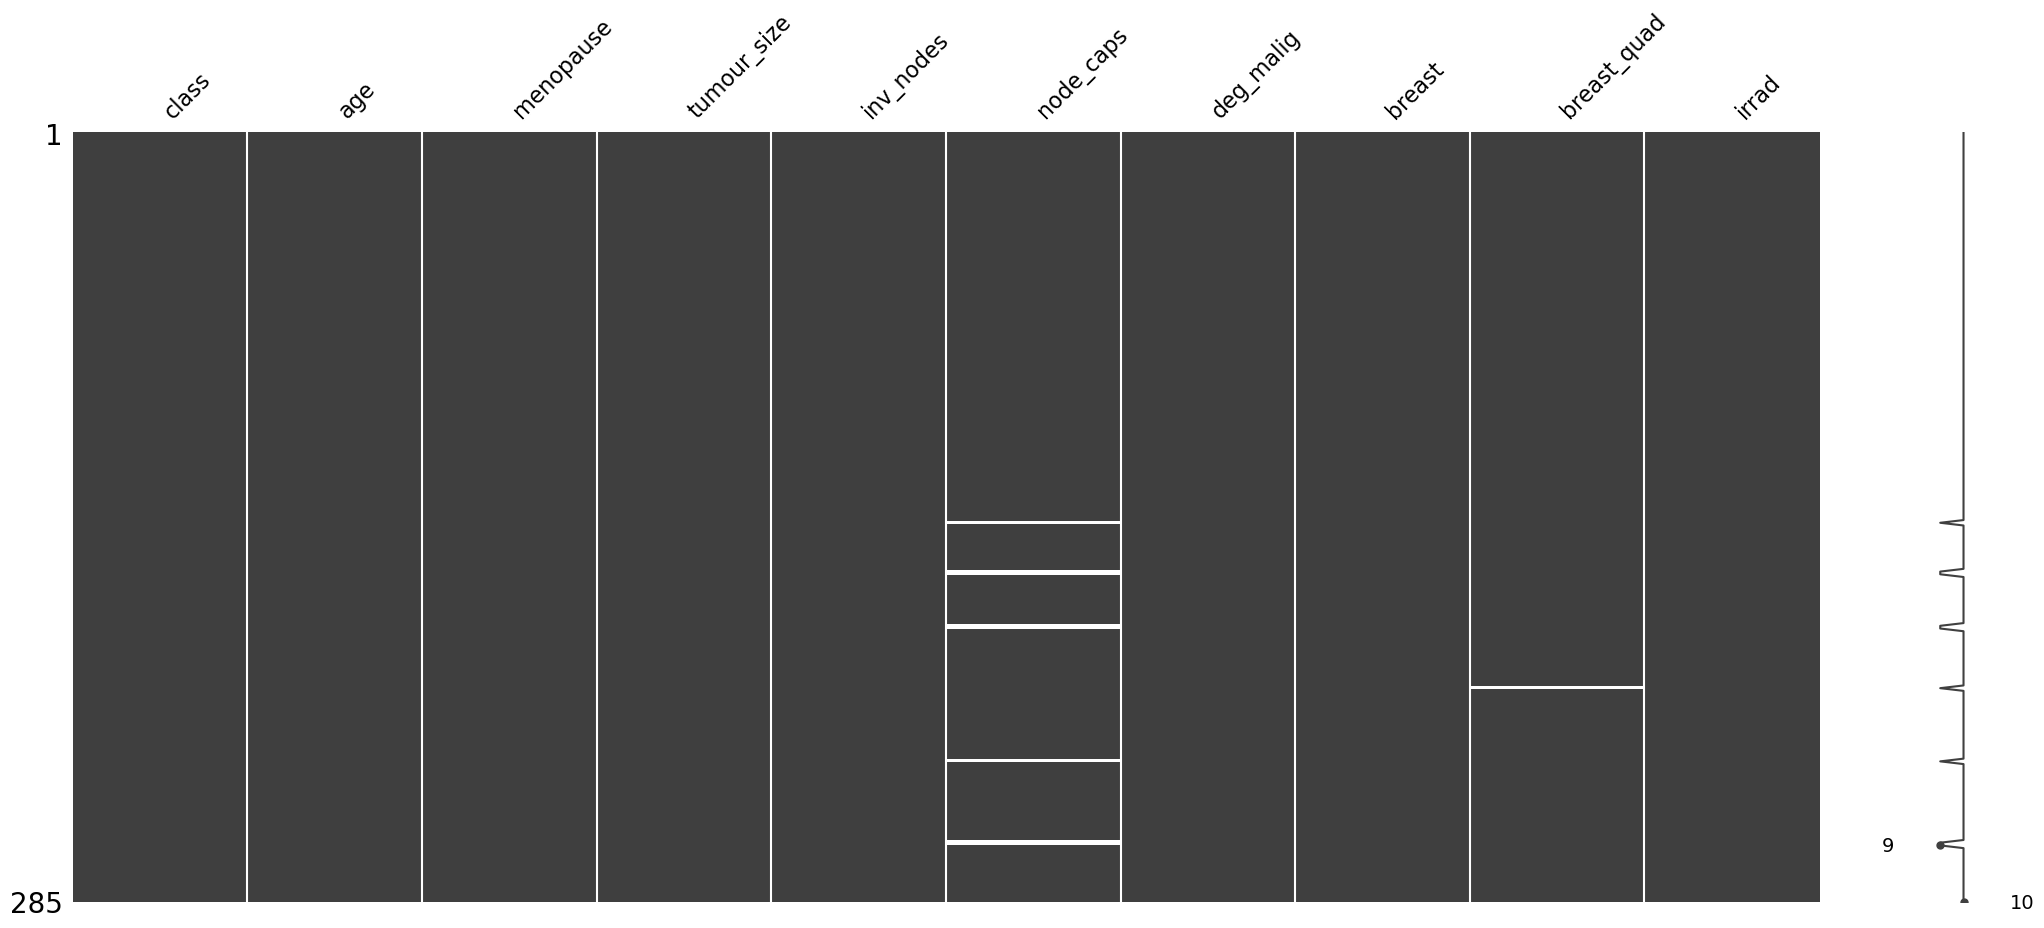

In [22]:
# identify where the missing values are in the dataset
#data.isna().any()
import missingno as msno
msno.matrix(data)

In [23]:
# find % of missing values per single attribute in the dataset
nan = data.isna().sum()
tot = data.count()
perc = (nan*100)/tot
perc

class          0.000000
age            0.000000
menopause      0.000000
tumour_size    0.000000
inv_nodes      0.000000
node_caps      2.888087
deg_malig      0.000000
breast         0.000000
breast_quad    0.352113
irrad          0.000000
dtype: float64

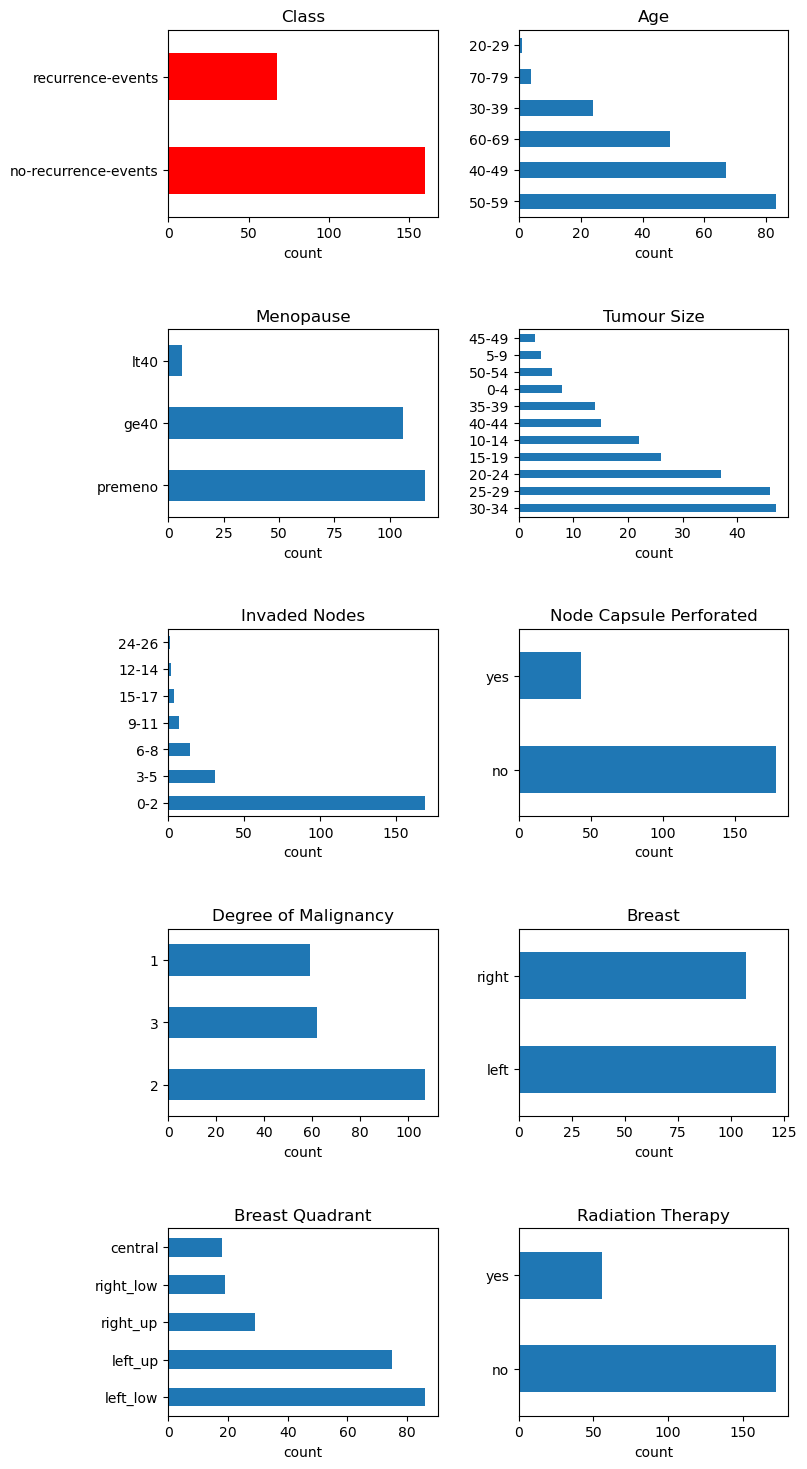

In [24]:
class_ = y_train.value_counts()
age_ = X_train['age'].value_counts()
menopause_ = X_train['menopause'].value_counts()
tumour_size_ = X_train['tumour_size'].value_counts()
inv_nodes_ = X_train['inv_nodes'].value_counts()
node_caps_ = X_train['node_caps'].value_counts()
deg_malig_ = X_train['deg_malig'].value_counts()
breast_ = X_train['breast'].value_counts()
breast_quad_ = X_train['breast_quad'].value_counts()
irrad_ = X_train['irrad'].value_counts()




# Create a figure with a 2x2 grid of subplots
fig, axs = plt.subplots(5, 2, gridspec_kw={'height_ratios': [10,10,10,10,10]})
fig.set_size_inches(8,18)



class_.plot.barh(ax=axs[0, 0], color='r')
age_.plot.barh(ax=axs[0, 1])
menopause_.plot.barh(ax=axs[1, 0])
tumour_size_.plot.barh(ax=axs[1, 1])
inv_nodes_.plot.barh(ax=axs[2, 0])
node_caps_.plot.barh(ax=axs[2, 1])
deg_malig_.plot.barh(ax=axs[3, 0])
breast_.plot.barh(ax=axs[3, 1])
breast_quad_.plot.barh(ax=axs[4, 0])
irrad_.plot.barh(ax=axs[4, 1])


# Set the title for each subplot
axs[0, 0].set_title('Class')
axs[0, 1].set_title('Age')
axs[1, 0].set_title('Menopause')
axs[1, 1].set_title('Tumour Size')
axs[2, 0].set_title('Invaded Nodes')
axs[2, 1].set_title('Node Capsule Perforated')
axs[3, 0].set_title('Degree of Malignancy')
axs[3, 1].set_title('Breast')
axs[4, 0].set_title('Breast Quadrant')
axs[4, 1].set_title('Radiation Therapy')

# Set the x-axis label for each subplot
axs[0, 0].set_xlabel('count')
axs[0, 1].set_xlabel('count')
axs[1, 0].set_xlabel('count')
axs[1, 1].set_xlabel('count')
axs[2, 0].set_xlabel('count')
axs[2, 1].set_xlabel('count')
axs[3, 0].set_xlabel('count')
axs[3, 1].set_xlabel('count')
axs[4, 0].set_xlabel('count')
axs[4, 1].set_xlabel('count')

plt.subplots_adjust(hspace=0.6, wspace=0.3)
plt.show()

#### Compute Correlation between the features

In [25]:
def cramers_v(data, x, y):
    cr_v = []
    confusion_matrix = pd.crosstab(data[x], data[y])
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    res = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    return res

In [36]:
import seaborn as sns
from scipy.stats import chi2_contingency

data = sns.load_dataset('tips')
#chisquare(data, 'smoker', 'sex')

groups = 'smoker'
categories = 'day'

correction=True
ct = pd.crosstab(data[groups], data[categories])

chi2, p_value, degrees_freedom, expected = chi2_contingency(ct, correction=correction)

print(p_value)
print(ct)
print(f'p-value significant? {(p_value < 0.05)}')


1.0567572499836523e-05
day     Thur  Fri  Sat  Sun
smoker                     
Yes       17   15   42   19
No        45    4   45   57
p-value significant? True


In [37]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


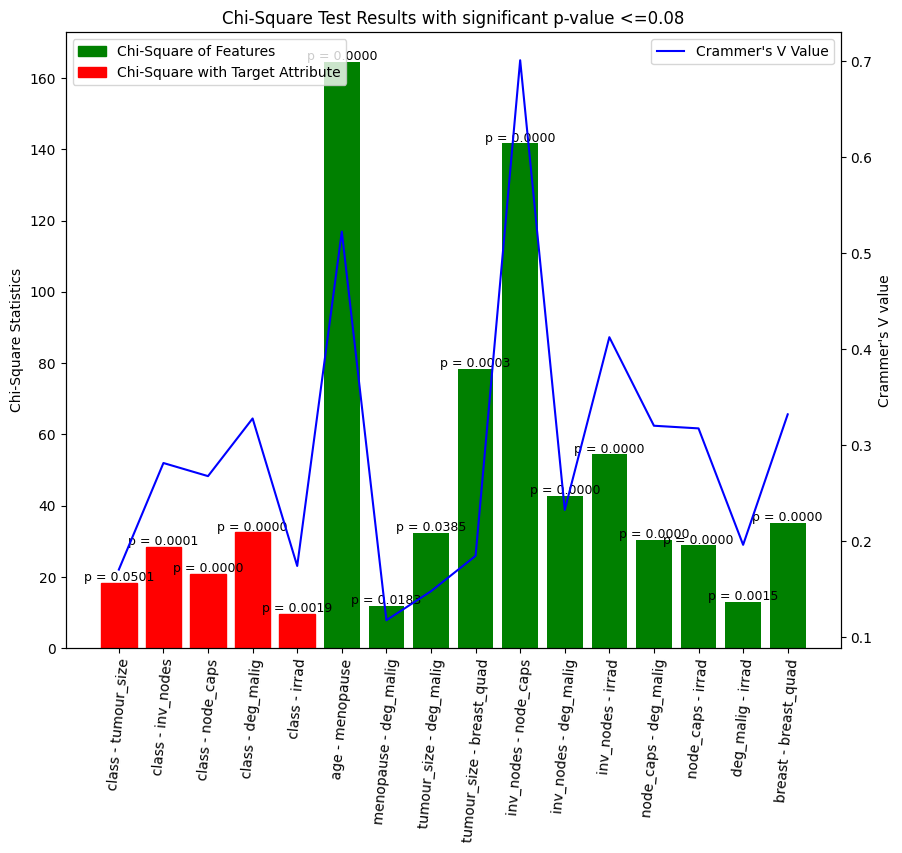

In [24]:
# TO DISCUSS
# perform correlation between attributes with non-continuous data
from scipy.stats import chi2_contingency
import matplotlib.patches as mpatches


columns = data.columns
chi_p = []
cra_v = []
for i, column1 in enumerate(columns):
    for column2 in columns[i + 1:]:
        table = pd.crosstab(data[column1], data[column2])
        chi2, p, dof, expected = chi2_contingency(table)
        res = cramers_v(data, column1, column2)
        if p<=0.0:
            chi_p.append([column1, column2, chi2, p])
            cra_v.append([column1, column2, res])
      
    
    "stat-sign": (p_value < 0.05), # X danio chi2 only for categorial features sign rel only if p<0.05

bar_width = 0.35
# plot the results for chi-squared statistic
x = [f"{result[0]} - {result[1]}" for result in chi_p]
y = [result[2] for result in chi_p]
p = [result[3] for result in chi_p]

# plot the results for chi-squared statistic
x2 = [f"{result[0]} - {result[1]}" for result in cra_v]
y2 = [result[2] for result in cra_v]

fig, ax1 = plt.subplots()
fig.set_size_inches(10,8)
ax1.bar(x, y, color='green')
ax1.set_ylabel('Chi-Square Statistics')

for i, v in enumerate(y):
    ax1.text(i, v + 0.5, f"p = {p[i]:.4f}", ha='center', fontsize=9)


# Highlight bars that correspond to a specific range of x-axis values
highlight_x = ['class - tumour_size','class - inv_nodes','class - node_caps','class - deg_malig', 'class - irrad']  # Example of features to highlight
highlight_indices = [x.index(i) for i in highlight_x]  # Get indices of bars that correspond to highlight_x
for index in highlight_indices:
    ax1.get_children()[index].set_color('red')  # Set the color of the bars at the indices to red


ax2 = ax1.twinx()
ax2.plot(x2, y2, color='blue')
ax2.set_ylabel("Crammer's V value")




# Add legends
ax1.legend(handles=[mpatches.Patch(color='green', label='Chi-Square of Features'),
                     mpatches.Patch(color='red', label='Chi-Square with Target Attribute')], loc='upper left')
ax2.legend(["Crammer's V Value"], loc='upper right')



plt.title("Chi-Square Test Results with significant p-value <=0.08")
plt.xlabel("Pairs of Features")
x_labels = [f"{result[0]} - {result[1]}" for result in chi_p]
ax1.set_xticks(np.arange(len(x)))
ax1.set_xticklabels(labels=x_labels, rotation=85)
plt.show()

I will probably exclude ```'age'``` and ```'menopause'``` from the model training as their correlation is too high which might lead to multicollinearity. The same goes for ```'inv_nodes'``` and ```'node_caps'``` but I believe they will be usefull for training the model due to their significant correlation with the target feature. I will also exclude ```'breast'``` due to possible multicollinearity with ```'breast_quad'``` and low to no-correlation with the target feature.<br>
I want to further analyse the target feature with all of the features that have some significant correlations, as well as ```'tumour_size'``` and ```'deg_malig'```; ```'tumour_size'``` and ```'breast_quad'```; ```'inv_nodes'``` and ```'node_caps'```; ```'inv_nodes'``` and ```'irrad'```

In [26]:
from IPython.display import display

# create a crosstab
def crosstab(x,y):
    crosstab = pd.crosstab(
                    data[x],
                    data[y],
                    margins=True,
                    normalize=True,
                )
    crosstab = crosstab.style.highlight_between(left=0.5, right=0.99, color="#276221")
    return crosstab


In [27]:
# function to calculate proportion based on attribute values
def proportion(x,x_n,y,y_n,data):
    tot = data[data[x]==x_n]
    part = tot[tot[y]==y_n]
    part = part[x].value_counts()
    tot = tot[x].value_counts()
    result = round(((part / tot) *100), 2)
    result = float(result)
    return result

Target Feature and ```'tumour_size'```

In [28]:
# run the function with 'class' and 'tumour_size'
crosstab('class', 'tumour_size')

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

In [28]:
df = data[['class', 'age', 'menopause', 'tumour_size', 'inv_nodes', 'node_caps', 'deg_malig', 'breast', 'breast_quad', 'irrad']]
df['tumour_size'] = df['tumour_size'].replace(['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54'],[0,1,2,3,4,5,6,7,8,9,10])

# run through a while loop to iterate proportion() for 7 times
count = 0  
lis = [] # list to append results and plot later

while count < 11:
    res = proportion('tumour_size',count,'class','recurrence-events',df)
    lis.append(res)
    count +=1

yax1 = np.array(lis)

Target Feature and ```'deg_malig'```

In [29]:
# run the function with 'class' and 'deg_malig'
crosstab('class', 'deg_malig')

deg_malig,1,2,3,All
class,,,,
no-recurrence-events,0.207018,0.357895,0.136842,0.701754
recurrence-events,0.042105,0.098246,0.157895,0.298246
All,0.249123,0.456140,0.294737,1.000000


In [29]:
bp1_2 = proportion('deg_malig',3,'class','recurrence-events',data)
bp2_2 = proportion('deg_malig',1,'class','no-recurrence-events',data)
bp3_2 = proportion('deg_malig',2,'class','no-recurrence-events',data)

Target Feature and ```'node_caps'```

In [30]:
# run the function with 'class' and 'node_caps'
crosstab('class', 'node_caps')

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

In [31]:
bp1_1 = proportion('node_caps','yes','class','recurrence-events',data)
bp2_1 = proportion('node_caps','no','class','recurrence-events',data)
bp3_1 = proportion('node_caps','yes','class','no-recurrence-events',data)

Target Feature and ```'irrad'```

In [32]:
# run the function with 'class' and 'irrad'
crosstab('class', 'irrad')

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

In [34]:
bp1_3 = proportion('irrad','yes','class','recurrence-events',data)
bp2_3 = proportion('irrad','no','class','recurrence-events',data)
bp3_3 = proportion('irrad','yes','class','no-recurrence-events',data)

Target Feature and ```'inv_nodes'```

In [35]:
# run the function with 'class' and 'inv_nodes'
crosstab('class', 'inv_nodes')

inv_nodes,0-2,12-14,15-17,24-26,3-5,6-8,9-11,All
class,,,,,,,,
no-recurrence-events,0.582456,0.003509,0.010526,0.000000,0.066667,0.024561,0.014035,0.701754
recurrence-events,0.161404,0.007018,0.010526,0.003509,0.059649,0.035088,0.021053,0.298246
All,0.743860,0.010526,0.021053,0.003509,0.126316,0.059649,0.035088,1.000000


In [36]:
df['inv_nodes'] = df['inv_nodes'].replace(['0-2','3-5','6-8','9-11','12-14','15-17','24-26'],[0,1,2,3,4,5,6])



# run through a while loop to iterate proportion() for 7 times
count = 0  
lis = [] # list to append results and plot later

while count < 7:
    res = proportion('inv_nodes',count,'class','recurrence-events',df)
    lis.append(res)
    count +=1

yax3 = np.array(lis)

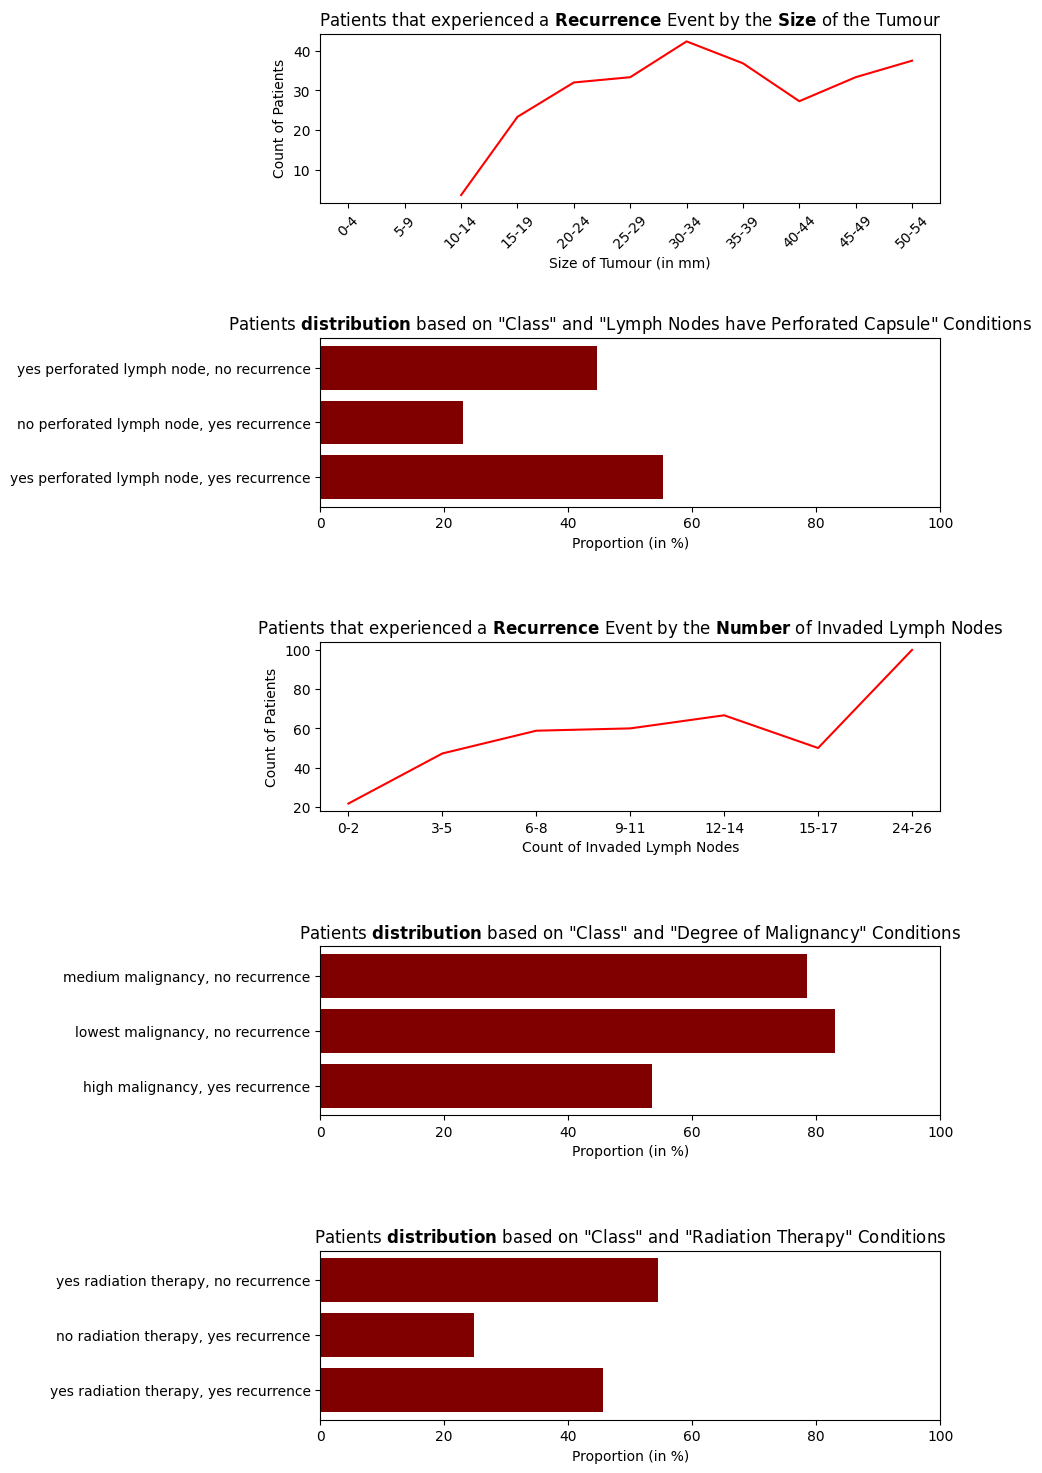

In [37]:
# create a subplot layout with three subplots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, gridspec_kw={'height_ratios': [10,10,10,10,10]})
fig.set_size_inches(8,18)


# add each of the individual plots to its corresponding subplot
ax1.plot(yax1, color = 'r')
ax2.barh(['yes perforated lymph node, yes recurrence','no perforated lymph node, yes recurrence', 'yes perforated lymph node, no recurrence'], [bp1_1,bp2_1,bp3_1], color='maroon')
ax3.plot(yax3, color = 'r')
ax4.barh(['high malignancy, yes recurrence','lowest malignancy, no recurrence', 'medium malignancy, no recurrence'], [bp1_2,bp2_2,bp3_2], color='maroon')
ax5.barh(['yes radiation therapy, yes recurrence','no radiation therapy, yes recurrence', 'yes radiation therapy, no recurrence'], [bp1_3,bp2_3,bp3_3], color='maroon')

ax1.set_title(r'Patients that experienced a $\bf{Recurrence}$ Event by the $\bf{Size}$ of the Tumour')
ax2.set_title(r'Patients $\bf{distribution}$ based on "Class" and "Lymph Nodes have Perforated Capsule" Conditions')
ax3.set_title(r'Patients that experienced a $\bf{Recurrence}$ Event by the $\bf{Number}$ of Invaded Lymph Nodes')
ax4.set_title(r'Patients $\bf{distribution}$ based on "Class" and "Degree of Malignancy" Conditions')
ax5.set_title(r'Patients $\bf{distribution}$ based on "Class" and "Radiation Therapy" Conditions')

ax1.set_xlabel('Size of Tumour (in mm)')
ax1.set_ylabel('Count of Patients')
ax1.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
ax1_labels = ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54']
ax1.set_xticklabels(ax1_labels, rotation=45)

ax2.set_xlabel('Proportion (in %)')
ax2.set_xlim(0, 100)

ax3.set_xlabel('Count of Invaded Lymph Nodes')
ax3.set_ylabel('Count of Patients')
ax3.set_xticks([0,1,2,3,4,5,6])
ax3_labels = ['0-2','3-5','6-8','9-11','12-14','15-17','24-26']
ax3.set_xticklabels(ax3_labels)

ax4.set_xlabel('Proportion (in %)')
ax4.set_xlim(0, 100)

ax5.set_xlabel('Proportion (in %)')
ax5.set_xlim(0, 100)

# show the figure
plt.subplots_adjust(hspace=0.8, wspace=0.6)
plt.show()

Those plots show that there is indeed a correlation with recurrence events in patients with the size of the tumour and the count of invaded lymph nodes. <br>
Patients that experience a recurrence event were more likely to have perforated lymph nodes.<br>
Patients that experienced a recurrence event and did have radiation therapy as a prevention method or part of treating the disease where little less than half, also to note that little more than half of patients that had radiation therapy didn't experience a recurrence. Meaning that radiation therapy can be considered a prevention factor but not totally, there is still an interesting correlation. <br>
Little more than half of the patients that had higher degree of malignancy experienced a recurrence later on. There is a correlation between degree of malignancy and recurrence events.

```'tumour_size'``` and ```'deg_malig'``` 

In [38]:
crosstab('tumour_size', 'deg_malig')

deg_malig,1,2,3,All
tumour_size,,,,
0-4,0.010526,0.014035,0.003509,0.028070
10-14,0.049123,0.042105,0.007018,0.098246
15-19,0.031579,0.052632,0.021053,0.105263
20-24,0.035088,0.094737,0.045614,0.175439
25-29,0.038596,0.091228,0.059649,0.189474
30-34,0.045614,0.073684,0.087719,0.207018
35-39,0.007018,0.024561,0.035088,0.066667
40-44,0.017544,0.031579,0.028070,0.077193
45-49,0.003509,0.003509,0.003509,0.010526


In [39]:
# run through a while loop to iterate proportion() for 7 times
count = 0  
lis = [] # list to append results and plot later

while count < 11:
    res = proportion('tumour_size',count,'deg_malig',3,df)
    lis.append(res)
    count +=1
yax4 = np.array(lis)


count = 0  
lis = [] # list to append results and plot later

while count < 11:
    res = proportion('tumour_size',count,'deg_malig',2,df)
    lis.append(res)
    count +=1
yax5 = np.array(lis)


count = 0  
lis = [] # list to append results and plot later

while count < 11:
    res = proportion('tumour_size',count,'deg_malig',1,df)
    lis.append(res)
    count +=1
yax6 = np.array(lis)

```'tumour_size'``` and ```'breast_quad'``` 

In [40]:
crosstab('tumour_size', 'breast_quad')

breast_quad,central,left_low,left_up,right_low,right_up,All
tumour_size,,,,,,
0-4,0.017606,0.003521,0.000000,0.007042,0.000000,0.028169
10-14,0.003521,0.042254,0.042254,0.007042,0.003521,0.098592
15-19,0.010563,0.052817,0.028169,0.010563,0.003521,0.105634
20-24,0.014085,0.066901,0.070423,0.010563,0.014085,0.176056
25-29,0.007042,0.077465,0.059859,0.028169,0.017606,0.190141
30-34,0.014085,0.059859,0.073944,0.017606,0.038732,0.204225
35-39,0.000000,0.031690,0.021127,0.000000,0.014085,0.066901
40-44,0.000000,0.031690,0.031690,0.000000,0.014085,0.077465
45-49,0.003521,0.003521,0.000000,0.000000,0.003521,0.010563


In [41]:
# run through a while loop to iterate proportion() for 7 times
count = 0  
lis = [] # list to append results and plot later

while count < 11:
    res = proportion('tumour_size',count,'breast_quad','central',df)
    lis.append(res)
    count +=1
yax7 = np.array(lis)


count = 0  
lis = [] # list to append results and plot later

while count < 11:
    res = proportion('tumour_size',count,'breast_quad','left_low',df)
    lis.append(res)
    count +=1
yax8 = np.array(lis)


count = 0  
lis = [] # list to append results and plot later

while count < 11:
    res = proportion('tumour_size',count,'breast_quad','left_up',df)
    lis.append(res)
    count +=1
yax9 = np.array(lis)

count = 0  
lis = [] # list to append results and plot later

while count < 11:
    res = proportion('tumour_size',count,'breast_quad','right_low',df)
    lis.append(res)
    count +=1
yax10 = np.array(lis)

count = 0  
lis = [] # list to append results and plot later

while count < 11:
    res = proportion('tumour_size',count,'breast_quad','right_up',df)
    lis.append(res)
    count +=1
yax11 = np.array(lis)

```'inv_nodes'``` and ```'node_caps'``` 

In [42]:
crosstab('inv_nodes', 'node_caps')

node_caps,no,yes,All
inv_nodes,,,
0-2,0.722022,0.032491,0.754513
12-14,0.003610,0.007220,0.010830
15-17,0.003610,0.018051,0.021661
24-26,0.000000,0.003610,0.003610
3-5,0.054152,0.068592,0.122744
6-8,0.010830,0.050542,0.061372
9-11,0.003610,0.021661,0.025271
All,0.797834,0.202166,1.000000


In [43]:
# run through a while loop to iterate proportion() for 7 times
count = 0  
lis = [] # list to append results and plot later

while count < 7:
    res = proportion('inv_nodes',count,'node_caps','yes',df)
    lis.append(res)
    count +=1

yax2 = np.array(lis)

```'inv_nodes'``` and ```'irrad'``` 

In [44]:
crosstab('inv_nodes', 'irrad')

irrad,no,yes,All
inv_nodes,,,
0-2,0.638596,0.105263,0.743860
12-14,0.000000,0.010526,0.010526
15-17,0.017544,0.003509,0.021053
24-26,0.000000,0.003509,0.003509
3-5,0.066667,0.059649,0.126316
6-8,0.028070,0.031579,0.059649
9-11,0.010526,0.024561,0.035088
All,0.761404,0.238596,1.000000


In [45]:
# run through a while loop to iterate proportion() for 7 times
count = 0  
lis = [] # list to append results and plot later

while count < 7:
    res = proportion('inv_nodes',count,'irrad','yes',df)
    lis.append(res)
    count +=1
yax12 = np.array(lis)

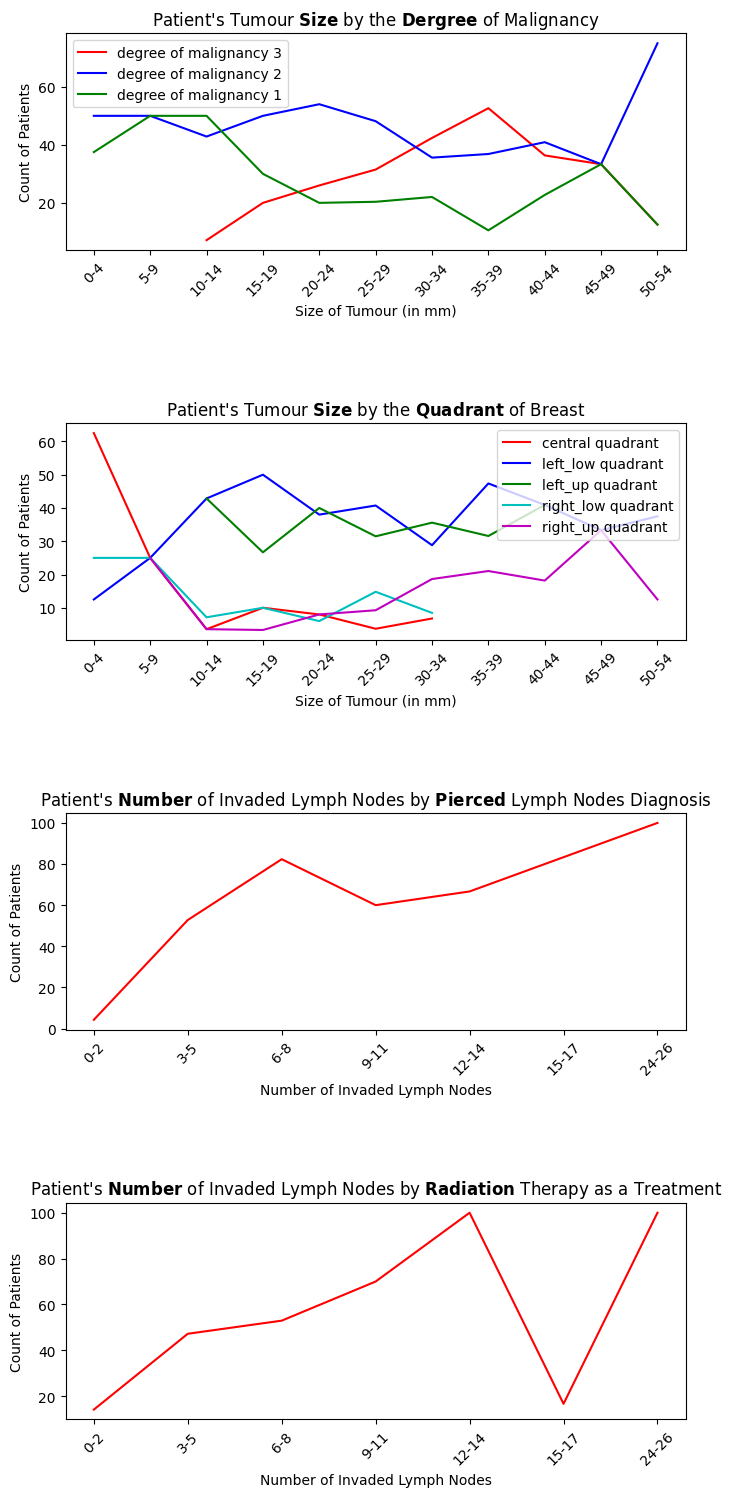

In [46]:
# create a subplot layout with three subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, gridspec_kw={'height_ratios': [10,10,10,10]})
fig.set_size_inches(8,18)


# add each of the individual plots to its corresponding subplot
ax1.plot(yax4, color = 'r', label='degree of malignancy 3')
ax1.plot(yax5, color = 'b', label='degree of malignancy 2')
ax1.plot(yax6, color = 'g', label='degree of malignancy 1')
ax1.legend()

ax2.plot(yax7, color = 'r', label='central quadrant')
ax2.plot(yax8, color = 'b', label='left_low quadrant')
ax2.plot(yax9, color = 'g', label='left_up quadrant')
ax2.plot(yax10, color = 'c', label='right_low quadrant')
ax2.plot(yax11, color = 'm', label='right_up quadrant')
ax2.legend(loc = 'upper right')

ax3.plot(yax2, color = 'r')

ax4.plot(yax12, color = 'r')


ax1.set_title(r"Patient's Tumour $\bf{Size}$ by the $\bf{Dergree}$ of Malignancy")
ax2.set_title(r"Patient's Tumour $\bf{Size}$ by the $\bf{Quadrant}$ of Breast")
ax3.set_title(r"Patient's $\bf{Number}$ of Invaded Lymph Nodes by $\bf{Pierced}$ Lymph Nodes Diagnosis")
ax4.set_title(r"Patient's $\bf{Number}$ of Invaded Lymph Nodes by $\bf{Radiation}$ Therapy as a Treatment")


ax1.set_xlabel('Size of Tumour (in mm)')
ax1.set_ylabel('Count of Patients')
ax1.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
ax1_labels = ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54']
ax1.set_xticklabels(ax1_labels, rotation=45)

ax2.set_xlabel('Size of Tumour (in mm)')
ax2.set_ylabel('Count of Patients')
ax2.set_xticks([0,1,2,3,4,5,6,7,8,9,10])
ax2_labels = ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54']
ax2.set_xticklabels(ax2_labels, rotation=45)

ax3.set_xlabel('Number of Invaded Lymph Nodes')
ax3.set_ylabel('Count of Patients')
ax3.set_xticks([0,1,2,3,4,5,6])
ax3_labels = ['0-2','3-5','6-8','9-11','12-14','15-17','24-26']
ax3.set_xticklabels(ax3_labels, rotation=45)

ax4.set_xlabel('Number of Invaded Lymph Nodes')
ax4.set_ylabel('Count of Patients')
ax4.set_xticks([0,1,2,3,4,5,6])
ax4_labels = ['0-2','3-5','6-8','9-11','12-14','15-17','24-26']
ax4.set_xticklabels(ax3_labels, rotation=45)

# show the figure
plt.subplots_adjust(hspace=0.8, wspace=0.6)
plt.show()

There is in fact a clear positive correlation between number of invaded lymph nodes and wether their capsule has been perforated or not.

##### Heuristic methodology

Using a *Heuristic methodology* based on the correlation analysis between the features I would predict if a patient is subject to have a recurrence event by looking at the degree of malignancy,tumour size as well as the number of invaded lymph nodes and wether their capsule resulted perforated.<br>
To make the *Heuristic methodology* more effective, I would compute an additional feature **Tumour Aggressivness**.

The degree of malignancy of a tumor is a measure of how abnormal the cells in the tumor are and how likely they are to spread to other parts of the body. It is usually based on the tumor's appearance under a microscope and other factors such as its size, location, and the presence of certain genetic mutations. Tumors that are more malignant are more likely to spread and be harder to treat.

The aggressiveness rate of a tumor, on the other hand, typically refers to how quickly a tumor is growing and spreading. It can also take into account factors such as the tumor's response to treatment and the likelihood of recurrence. Tumors that are more aggressive may be more likely to grow and spread rapidly, making them more difficult to treat.

#### Compute Feature Importance

Before identifying the most promising transformations I can make on features I want to have a look at feature importance

In [47]:
# transform the features to int data using LabelEncoder
# TO DISCUSS: double check https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

X_train_encoded = X_train[['age', 'menopause', 'tumour_size', 'inv_nodes', 'node_caps', 'deg_malig', 'breast', 'breast_quad', 'irrad']]

# NOTE: don't process the test during training phase 
#X_test_encoded = X_test[['age', 'menopause', 'tumour_size', 'inv_nodes', 'node_caps', 'deg_malig', 'breast', 'breast_quad', 'irrad']]

# TO apply only for categorical features
for col in X_train.columns:
    X_train_encoded[col] = label_encoder.fit_transform(X_train[col])

for col in X_test.columns:
    X_test_encoded[col] = label_encoder.fit_transform(X_test[col])

In [55]:
X_train.head()

,age,menopause,tumour_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irrad
215,40-49,ge40,20-24,0-2,no,2,right,left_up,no
41,60-69,ge40,25-29,0-2,no,2,left,left_low,no
24,50-59,premeno,35-39,0-2,no,2,right,left_up,no
161,40-49,premeno,30-34,3-5,yes,2,right,left_low,no
144,60-69,ge40,45-49,6-8,yes,3,left,central,no


In [64]:
# this for categorical features
pd.get_dummies(X_train['menopause'], drop_first=False)
# Ordinal feature e.g. age use LabelEncoding

,ge40,lt40,premeno
215,1,0,0
41,1,0,0
24,0,0,1
161,0,0,1
144,1,0,0
...,...,...,...
190,0,0,1
210,0,0,1
237,0,0,1
209,0,0,1


In [49]:
y_train = label_encoder.fit_transform(y_train)

y_test = label_encoder.fit_transform(y_test)

In [52]:
# NOTE: inverse operation 
#label_encoder.inverse_transform(y_test)

In [38]:
X_train_encoded

,age,menopause,tumour_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irrad
214,2,0,3,0,0,1,1,2,0
41,4,0,9,0,0,0,0,0,0
24,2,2,4,0,0,1,0,2,0
161,4,0,1,0,0,1,1,2,1
144,2,2,4,0,2,1,0,3,1
...,...,...,...,...,...,...,...,...,...
189,2,2,2,1,0,2,1,3,1
209,2,2,3,0,0,1,0,1,0
236,2,2,4,0,0,1,1,1,0
208,2,2,6,0,0,0,1,2,0


In [49]:
X_train_encoded.head()

,age,menopause,tumour_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irrad
214,2,0,3,0,0,1,1,2,0
41,4,0,9,0,0,0,0,0,0
24,2,2,4,0,0,1,0,2,0
161,4,0,1,0,0,1,1,2,1
144,2,2,4,0,2,1,0,3,1


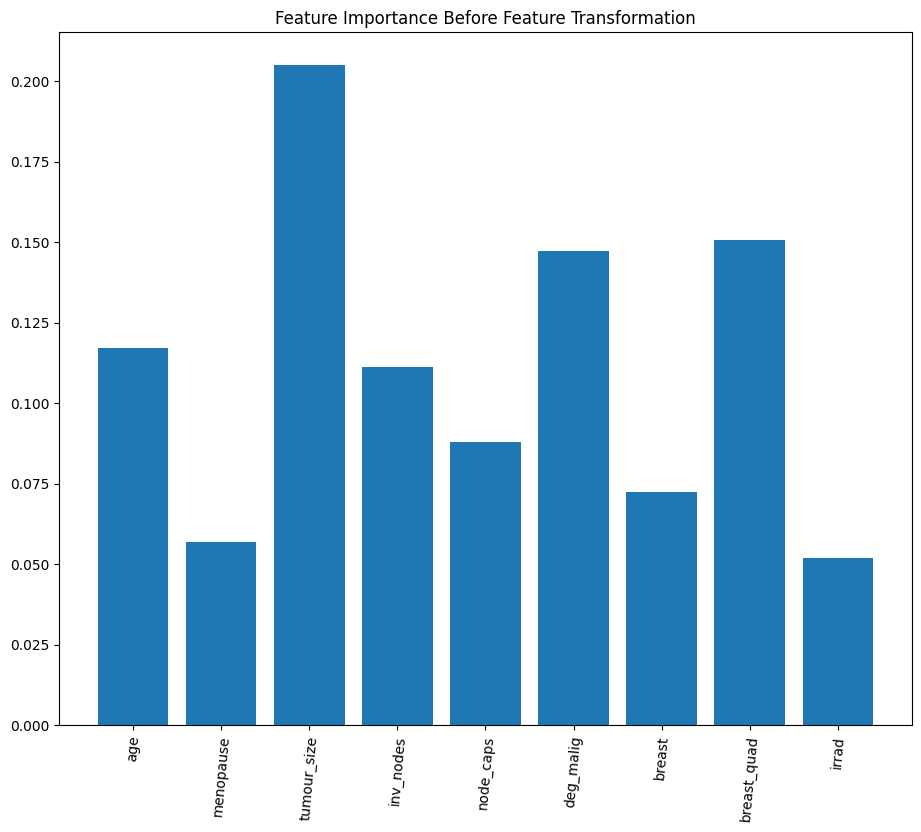

In [50]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier()
clf.fit(X_train_encoded,y_train)

plt.figure(figsize=(11,9))
plt.bar(X_train_encoded.columns, clf.feature_importances_)
plt.xticks(rotation=85)
plt.title('Feature Importance Before Feature Transformation')
plt.show()

#### Feature Transformations

There are a few transformations that might be usefull to apply such as cost-sensitive resampling or simply oversampling the minority class of the target feature. The ML model assumes the data is balanced, so having a balanced target feature might be one of the first necessary transformations. I will apply said transformation while pre-training the model for evaluation. <br>

Regarding the features used to train the model I wouldn't apply any transformation but use feature engineering to maximize their potential.<br>

By having extra data such as general health conditions of the patient and healthy or unealthy practices (smoke, diet...) it would be easier to dig into factors that might affect the probability of experiencing a recurrence event for a given patient.

### Feature Engineering

As said earlier, **Aggressiveness** of the tumour might be a usefull feature to include in the training of the model.<br>

By definition, *the aggressiveness rate of a tumor typically refers to how quickly a tumor is growing and spreading. It can also take into account factors such as the tumor's response to treatment and the likelihood of recurrence. Tumors that are more aggressive may be more likely to grow and spread rapidly, making them more difficult to treat.*

To compute this new feature I will use tumour_size and inv_nodes. Then, re-compute feature importance

In [51]:
# create a new feature
# TO DISCUSS: do not touch the test
# w = a*x1 + b*x2
# you are introding multicollinearity similar to the hot encoding drop_first
# check the unit before aggregating the features
# it does not make much sense to add encoded values

X_train_encoded['agg'] = X_train_encoded['tumour_size'] + X_train_encoded['inv_nodes']

X_test_encoded['agg'] = X_test_encoded['tumour_size'] + X_test_encoded['inv_nodes']

In [52]:
X_train_encoded[['tumour_size', 'inv_nodes', 'agg']].head()

,tumour_size,inv_nodes,agg
214,3,0,3
41,9,0,9
24,4,0,4
161,1,0,1
144,4,0,4


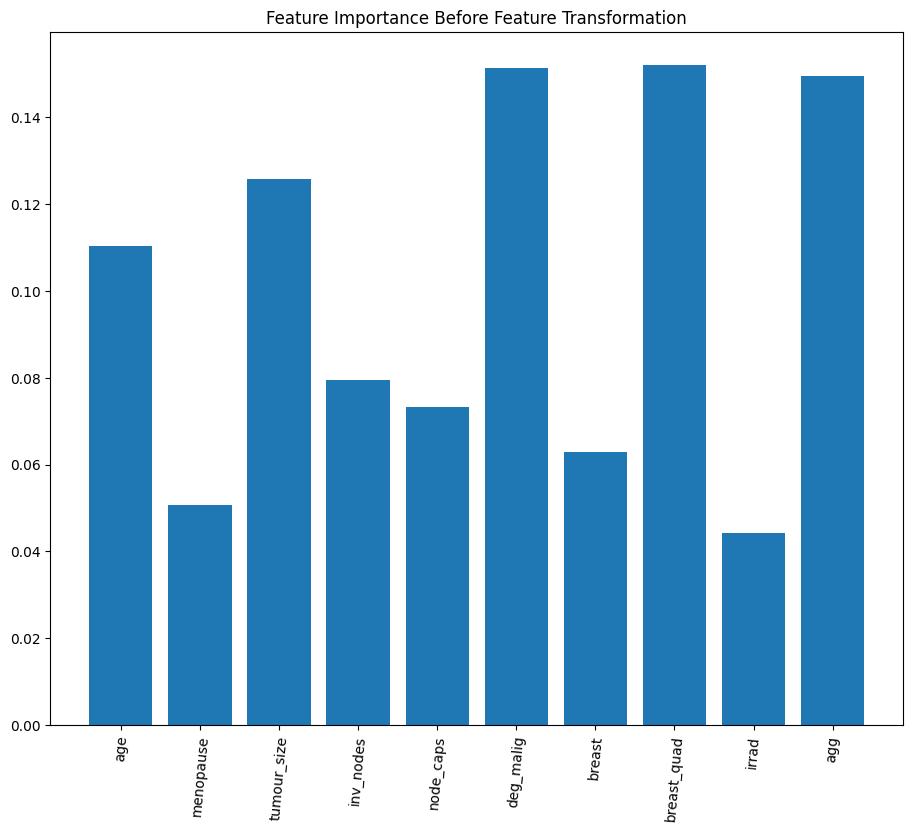

In [53]:
# compute feature importance
clf.fit(X_train_encoded,y_train)

plt.figure(figsize=(11,9))
plt.bar(X_train_encoded.columns, clf.feature_importances_)
plt.xticks(rotation=85)
plt.title('Feature Importance Before Feature Transformation')
plt.show()

<AxesSubplot:>

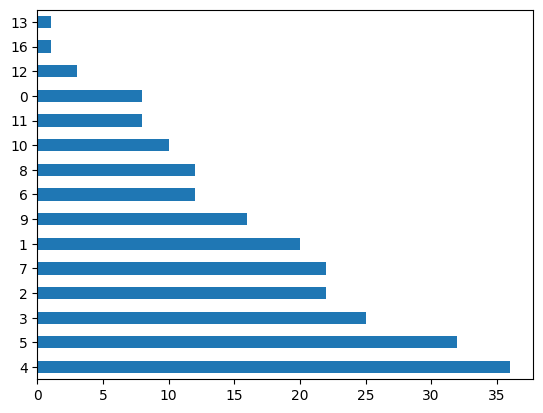

In [54]:
agg_ = X_train_encoded['agg'].value_counts()
agg_.plot.barh()

Text(0, 0.5, 'Count of Patients')

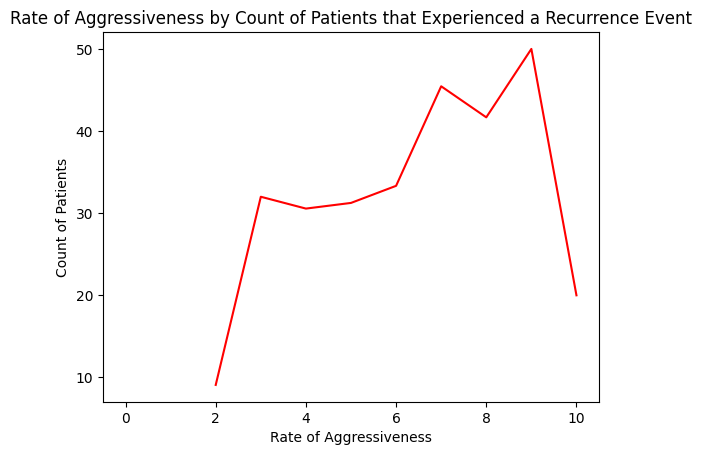

In [55]:
# TO DISCUSS
df['agg'] = X_train_encoded[['agg']]

# check the correlation with the target feature
count = 0  
lis = [] # list to append results and plot later

while count < 11:
    res = proportion('agg',count,'class','recurrence-events',df)
    lis.append(res)
    count +=1

yax15 = np.array(lis)
plt.plot(yax15, color='r')
plt.title('Rate of Aggressiveness by Count of Patients that Experienced a Recurrence Event')
plt.xlabel('Rate of Aggressiveness')
plt.ylabel('Count of Patients')

### Pre-training the Model and Evaluation

The first thing I would do is to select the most important features

In [56]:
important_features = ['inv_nodes', 'tumour_size', 'deg_malig', 'breast_quad', 'agg']
X_train_encoded = X_train_encoded[important_features]
X_test_encoded = X_test_encoded[important_features]

In [57]:
# create a validation set to train and evaluate the model
X_train_eval, X_eval, y_train_eval, y_eval = train_test_split(X_train_encoded, y_train, test_size=0.2, stratify=y_train, random_state=42)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, precision_score

from imblearn.over_sampling import RandomOverSampler  # first get the score at baseline (without oversmapling and then try if with oversampling you get better e.g. via SMOTE

from IPython.display import display

def normal_pred(model, X_train, y_train, X_test, y_test):
    #normal model
    model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    n_acc = model.score(X_train, y_train)
    n_f1 = f1_score(y_test, y_pred, average='binary')
    y_score = model.predict_proba(X_test)[:, 1]
    n_roc_auc = roc_auc_score(y_test, y_score)
    n_rec = recall_score(y_test, y_pred)
    n_pre = precision_score(y_test, y_pred)
    return n_acc, n_f1, n_roc_auc, n_rec, n_pre


# use for model training and hyperparameter tuning in crossvalidation https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

def cost_sensitive(model, X_train, y_train, X_test, y_test):
    if model == 'RandomForestClassifier()':
        model = RandomForestClassifier(class_weight={0: 1, 1: 2})
    if model == 'LogisticRegression()':
        model = LogisticRegression(class_weight={0: 1, 1: 2})
    if model == 'DecisionTreeClassifier()':
        model = DecisionTreeClassifier(class_weight={0: 1, 1: 2})
    if model == 'KNeighborsClassifier(n_neighbors=5)':
        model = KnNeighborsClassifier(n_neighbors=5,class_weight={0: 1, 1: 2})
    # cost-sensitive prioritizing recall model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    c_acc = model.score(X_train, y_train)
    c_f1 = f1_score(y_test, y_pred, average='binary')
    c_roc_auc = 0
    c_rec = recall_score(y_test, y_pred)
    c_pre = precision_score(y_test, y_pred)
    return c_acc, c_f1, c_roc_auc, c_rec, c_pre

# NOTE: can use this https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

def resampling(model, X_train, y_train, X_test, y_test):
    # resampling to make target class balanced
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
    X_eval_resampled, y_eval_resampled = ros.fit_resample(X_test, y_test)
    model = model 
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_eval_resampled)
    r_acc = model.score(X_train, y_train)
    r_f1 = f1_score(y_eval_resampled, y_pred, average='binary')
    y_score = model.predict_proba(X_eval_resampled)[:, 1]
    r_roc_auc = roc_auc_score(y_eval_resampled, y_score)
    r_rec = recall_score(y_eval_resampled, y_pred)
    r_pre = precision_score(y_eval_resampled, y_pred)
    
    
    
    return r_acc, r_f1, r_roc_auc, r_rec, r_pre, X_resampled, y_resampled, X_eval_resampled, y_eval_resampled


def threshold(model, X_train, y_train, X_test, y_test):
    model = model
    model.fit(X_train, y_train)
    y_score = model.predict_proba(X_test)[:, 1]
    threshold = 0.35
    y_pred = (y_score >= threshold).astype(int)
    t_acc = 0
    t_f1 = f1_score(y_test, y_pred, average='binary')
    t_roc_auc = roc_auc_score(y_test, y_pred)
    t_rec = recall_score(y_test, y_pred)
    t_pre = precision_score(y_test, y_pred)
    return t_acc, t_f1, t_roc_auc, t_rec, t_pre


def cross_val(model, X_train, y_train):
    scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    return mean_score, std_score


def metrics_table(a,b,c,d,e,f,g,h,i,l,m,n,o,p,q,r,s,t,u,v,mean,std,model):
    data = [[a,b,c,d,e],[f,g,h,i,l],[m,n,o,p,q],[r,s,t,u,v]]
    index = ['Normal', 'Cost-sensitive Resampling', 'Sampling to Balanced', 'Minimum Threshold']
    table = pd.DataFrame(data, columns=['Accuracy', 'F1-score', 'ROC-AUC', 'Recall', 'Precision'], index=index)
    table = table.style.highlight_between(left=0.68, right=0.99, color="#276221")
    print(model, 'Cross-Validation Mean:', mean, 'Standard-dev:', std)
    print(display(table))
    print('\n')


def mod_eval(model, X_train, y_train, X_test, y_test):
    n_acc, n_f1, n_roc_auc, n_rec, n_pre = normal_pred(model, X_train, y_train, X_test, y_test)
    c_acc, c_f1, c_roc_auc, c_rec, c_pre = cost_sensitive(model, X_train, y_train, X_test, y_test)
    r_acc, r_f1, r_roc_auc, r_rec, r_pre, X_resampled, y_resampled, X_eval_resampled, y_eval_resampled  = resampling(model, X_train, y_train, X_test, y_test)
    t_acc, t_f1, t_roc_auc, t_rec, t_pre = threshold(model, X_train, y_train, X_test, y_test)
    mean_score, std_score = cross_val(model, X_train, y_train)
    metrics_table(n_acc,n_f1,n_roc_auc,n_rec,n_pre,c_acc,c_f1,c_roc_auc,c_rec,c_pre,r_acc,r_f1,r_roc_auc,r_rec,r_pre,t_acc,t_f1,t_roc_auc,t_rec,t_pre,mean_score,std_score,model)
    return X_resampled, y_resampled, X_eval_resampled, y_eval_resampled


# user pipeline sklearn https://scikit-learn.org/stable/modules/compose.html instead of 
# https://towardsdatascience.com/pipelines-custom-transformers-in-scikit-learn-the-step-by-step-guide-with-python-code-4a7d9b068156
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html

# label_encoder([col1, col2])
# standard_scaler("col3")
# RandomForestClassifier.predict()
# label_encoder.inverse_transform()
# and you can feed the pipeline to the gridsearchCV


In [59]:
models = [RandomForestClassifier(),LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(n_neighbors=5), SVC(kernel='linear', probability=True)]

for model in models:
    mod_eval(model, X_train_eval, y_train_eval, X_eval, y_eval)

RandomForestClassifier() Cross-Validation Mean: 0.7306306306306306 Standard-dev: 0.05407365343706738


,Accuracy,F1-score,ROC-AUC,Recall,Precision
Normal,0.912088,0.500000,0.695312,0.500000,0.500000
Cost-sensitive Resampling,0.912088,0.482759,0.000000,0.500000,0.466667
Sampling to Balanced,0.895604,0.716418,0.766602,0.750000,0.685714
Minimum Threshold,0.000000,0.545455,0.665179,0.642857,0.473684


None


LogisticRegression() Cross-Validation Mean: 0.7686186186186186 Standard-dev: 0.06374647568856073


,Accuracy,F1-score,ROC-AUC,Recall,Precision
Normal,0.796703,0.480000,0.737723,0.428571,0.545455
Cost-sensitive Resampling,0.796703,0.480000,0.000000,0.428571,0.545455
Sampling to Balanced,0.719780,0.714286,0.714355,0.781250,0.657895
Minimum Threshold,0.000000,0.555556,0.669643,0.714286,0.454545


None


DecisionTreeClassifier() Cross-Validation Mean: 0.7085585585585586 Standard-dev: 0.08331155195146972


,Accuracy,F1-score,ROC-AUC,Recall,Precision
Normal,0.912088,0.466667,0.686384,0.500000,0.437500
Cost-sensitive Resampling,0.912088,0.482759,0.000000,0.500000,0.466667
Sampling to Balanced,0.901099,0.794118,0.791992,0.843750,0.750000
Minimum Threshold,0.000000,0.514286,0.633929,0.642857,0.428571


None


KNeighborsClassifier() Cross-Validation Mean: 0.6972972972972974 Standard-dev: 0.04905430912940351


,Accuracy,F1-score,ROC-AUC,Recall,Precision
Normal,0.752747,0.416667,0.707589,0.357143,0.500000
Cost-sensitive Resampling,0.752747,0.416667,0.000000,0.357143,0.500000
Sampling to Balanced,0.813187,0.738462,0.802734,0.750000,0.727273
Minimum Threshold,0.000000,0.625000,0.732143,0.714286,0.555556


None


SVC(kernel='linear', probability=True) Cross-Validation Mean: 0.7088588588588589 Standard-dev: 0.044497168629408924


,Accuracy,F1-score,ROC-AUC,Recall,Precision
Normal,0.747253,0.518519,0.735491,0.500000,0.538462
Cost-sensitive Resampling,0.747253,0.518519,0.000000,0.500000,0.538462
Sampling to Balanced,0.730769,0.735294,0.729980,0.781250,0.694444
Minimum Threshold,0.000000,0.500000,0.640625,0.500000,0.500000


None




### Evaluate the Models Performance

#### Learning Curve

In [60]:
model = DecisionTreeClassifier()

# performing resampling
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_eval, y_train_eval)
X_eval_resampled, y_eval_resampled = ros.fit_resample(X_eval, y_eval)
model = model 
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_eval_resampled)
r_acc = model.score(X_train_resampled, y_train_resampled)
r_f1 = f1_score(y_eval_resampled, y_pred, average='binary')
y_score = model.predict_proba(X_eval_resampled)[:, 1]
r_roc_auc = roc_auc_score(y_eval_resampled, y_score)
r_rec = recall_score(y_eval_resampled, y_pred)
r_pre = precision_score(y_eval_resampled, y_pred)

print(r_f1)

0.7462686567164178


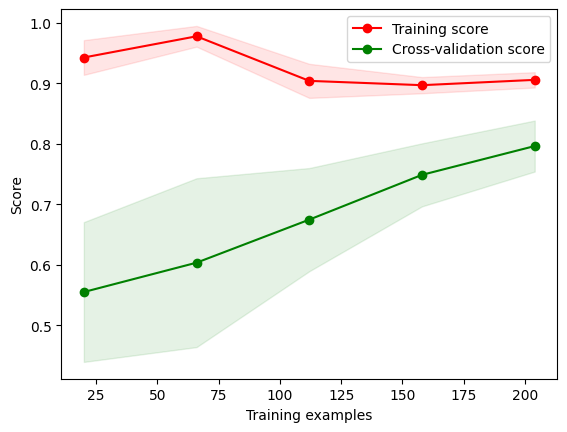

In [61]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(model, X_train_resampled, y_train_resampled, cv=5, scoring='f1_macro')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

#### Precision-Recall Metric

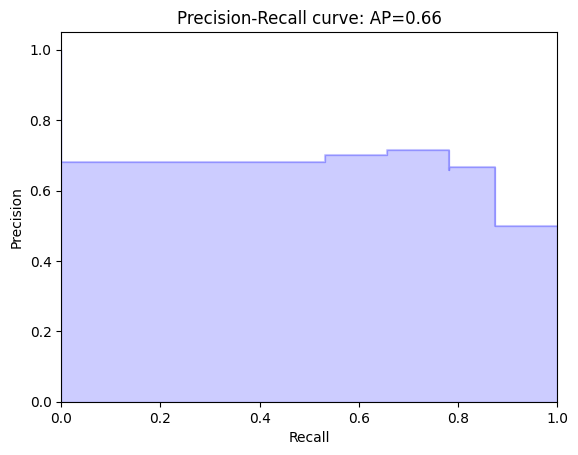

In [62]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, _ = precision_recall_curve(y_eval_resampled, y_score)
average_precision = average_precision_score(y_eval_resampled, y_score)

# plot the precision-recall curve
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.show()

#### ROC-curve

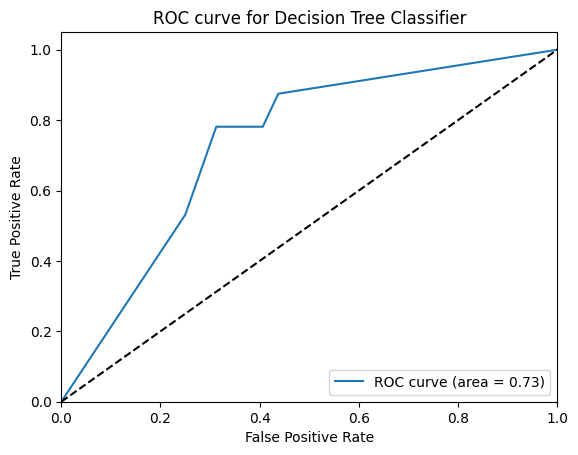

In [63]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_eval_resampled, y_score)
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()


#### Partial Dependence Plots (PDPs)

c:\Users\datac\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)
c:\Users\datac\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)
c:\Users\datac\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instea

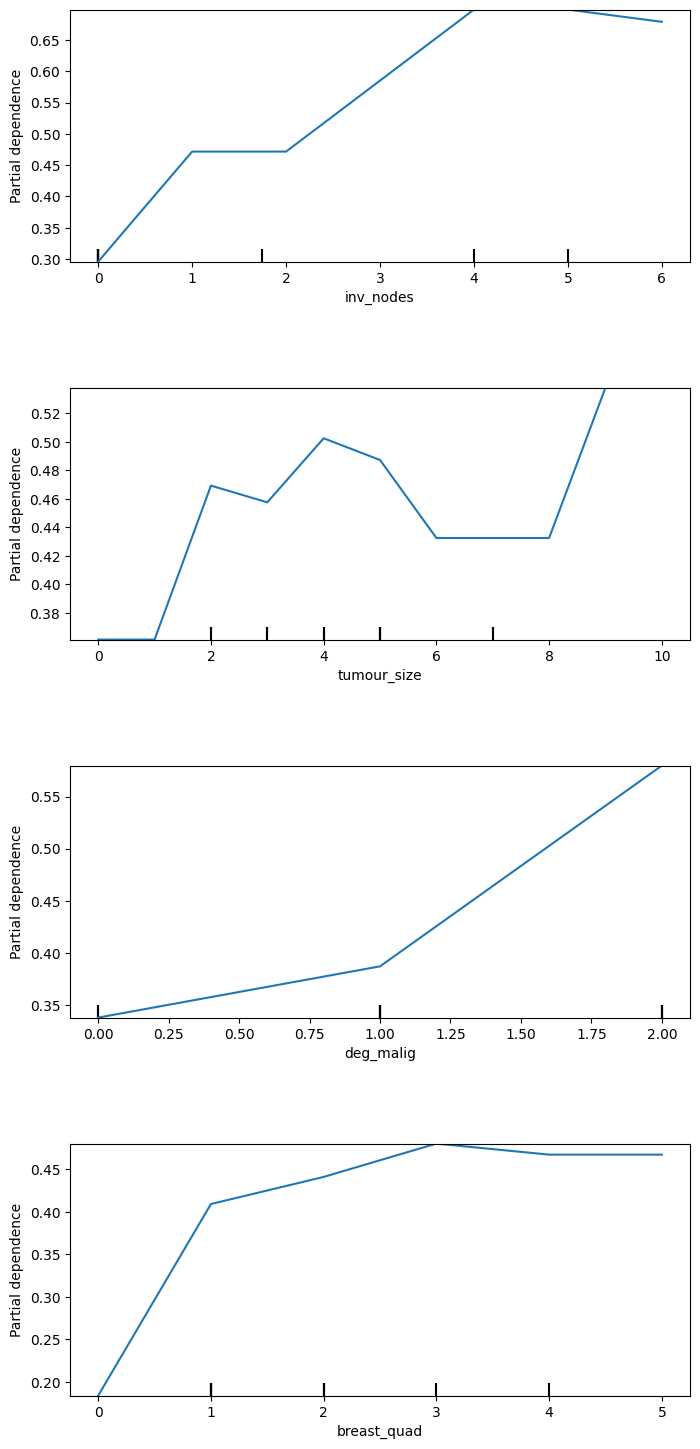

In [64]:
from sklearn.inspection import plot_partial_dependence
features = [0, 1, 2, 3]

# Create a grid of subplots
fig, axs = plt.subplots(nrows=len(features), ncols=1, figsize=(8, 18))

# Loop over the features and plot the partial dependence on a different subplot
for i, feature in enumerate(features):
    display = plot_partial_dependence(model, X_train_resampled, features=[feature], ax=axs[i])
    axs[i].set_xlabel(f'Feature {feature}')
    axs[i].set_ylabel('Partial Dependence')
    axs[i].set_ylim([0,1])

    
# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

plt.show()

In [65]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_eval_resampled, y_eval_resampled, n_repeats=10, random_state=0)
importance_scores = result.importances_mean
sorted_idx = importance_scores.argsort()
for i in sorted_idx:
    print(f"{X_eval_resampled.columns[i]}: {importance_scores[i]}")

agg: 0.03125
tumour_size: 0.053125
deg_malig: 0.0671875
inv_nodes: 0.0984375
breast_quad: 0.1671875


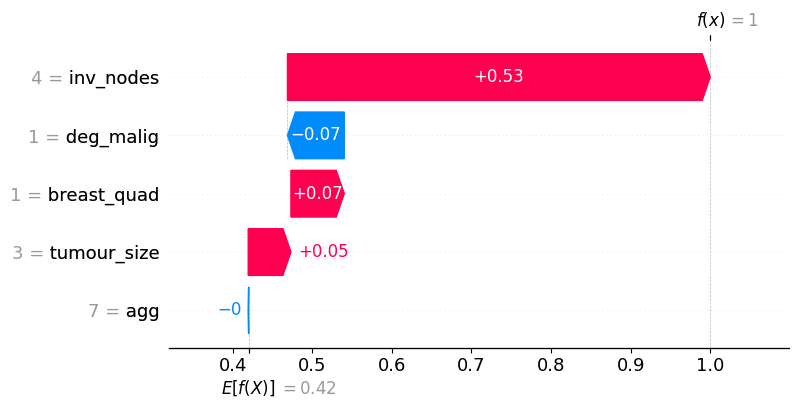

In [66]:
import shap

explainer = shap.Explainer(model.predict, X_train_resampled)
shap_values = explainer(X_eval_resampled)

# Plot the SHAP values for a single prediction
shap.plots.waterfall(shap_values[0])

### Test with unseen data

In [67]:
# TO DISCUSS
model = DecisionTreeClassifier()

# performing resampling
ros = RandomOverSampler(random_state=42)
X_train_encod_resampled, y_train_encod_resampled = ros.fit_resample(X_train_encoded, y_train)
X_test_encod_resampled, y_test_encod_resampled = ros.fit_resample(X_test_encoded, y_test)
model = model 
model.fit(X_train_encod_resampled, y_train_encod_resampled)
y_pred = model.predict(X_test_encod_resampled)
r_acc = model.score(X_train_encod_resampled, y_train_encod_resampled)
r_f1 = f1_score(y_test_encod_resampled, y_pred, average='binary')
y_score = model.predict_proba(X_test_encod_resampled)[:, 1]
r_roc_auc = roc_auc_score(y_test_encod_resampled, y_score)
r_rec = recall_score(y_test_encod_resampled, y_pred)
r_pre = precision_score(y_test_encod_resampled, y_pred)

print(r_f1)
print(r_roc_auc)
print(r_rec)
print(r_pre)


0.4126984126984127
0.4603125
0.325
0.5652173913043478


#### Cross Validation

In [68]:
from sklearn.model_selection import KFold, cross_val_score
import statistics

k_f = KFold(n_splits=10, shuffle=True)

In [69]:
def crossvalidation_score(model):
    model_score = cross_val_score(model, X_train_encod_resampled, y_train_encod_resampled, cv =k_f, scoring='accuracy')
    print('----',model,':','----')
    print(model_score,'\n')
    print('Mean:',model_score.mean())
    print('Standard Deviation:',statistics.stdev(model_score), '\n')

In [70]:
from sklearn.metrics import make_scorer

scorer = make_scorer(f1_score)

# Perform cross-validation and calculate F1 score for each fold
cv_scores = cross_val_score(model, X_train_encod_resampled, y_train_encod_resampled, cv=5, scoring=scorer)

# Print the mean and standard deviation of the F1 scores
print('CV F1 score: {:.3f} +/- {:.3f}'.format(cv_scores.mean(), cv_scores.std()))

CV F1 score: 0.806 +/- 0.031


The cross-validation proves a good f1-score that with a model that minimizes false negatives and false positives.<br>

There could be several reasons why the F1 score on the test set is lower than the F1 score obtained from cross-validation:

Overfitting: The model might have overfit to the training data, resulting in poor performance on the test set. This can happen if the model is too complex relative to the amount of training data, or if the model has been trained for too many epochs.

Data Drift: The data in the test set might be different from the data in the training set. This can happen if the data is collected from a different source, or if the data distribution has changed over time.

Hyperparameter Tuning: The hyperparameters selected during cross-validation might not be optimal for the test set. This can happen if the model's performance during cross-validation was optimized for the validation set, but does not generalize well to the test set.

Sample Size: The sample size in the test set might be too small to accurately estimate the model's performance. In this case, the F1 score obtained from the test set might be an unreliable estimate of the model's true performance.